In [2]:
import requests
from bs4 import BeautifulSoup

def get_topics_page(url):
  response=requests.get(url)
  #check successfull response
  if response.status_code != 200:
    raise Exception (f'Failed to load page{topic_url}')
  #parse using BeautifulSoup
  doc = BeautifulSoup(response.text,'html.parser')
  return doc

In [3]:
topic_url =  'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=000&ref_=adv_next'
doc = get_topics_page(topic_url)
doc.find('title')

<title>IMDb "Top 1000"
(Sorted by IMDb Rating Descending) - IMDb</title>

In [4]:
def get_movie_titles(doc):
    
    selection_class="lister-item-header"
    movie_title_tags=doc.find_all('h3',{'class':selection_class})
    movie_titles=[]

    for tag in movie_title_tags:
        title = tag.find('a').text
        movie_titles.append(title)
        
        
    return movie_titles

In [5]:
titles = get_movie_titles(doc)

In [6]:
titles[:5]

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Lord of the Rings: The Return of the King',
 "Schindler's List"]

In [7]:
#Similarly I defined functions for movie url, ratings, certification, duration and  year
def get_movie_url(doc):
    url_selector="lister-item-header"           
    movie_url_tags=doc.find_all('h3',{'class':url_selector})
    movie_url_tagss=[]
    base_url = 'https://www.imdb.com/'
    for tag in movie_url_tags:
        movie_url_tagss.append('https://www.imdb.com/' + tag.find('a')['href'])
    return movie_url_tagss

In [8]:
urls = get_movie_url(doc)

In [9]:
urls[:5]

['https://www.imdb.com//title/tt0111161/',
 'https://www.imdb.com//title/tt0068646/',
 'https://www.imdb.com//title/tt0468569/',
 'https://www.imdb.com//title/tt0167260/',
 'https://www.imdb.com//title/tt0108052/']

In [10]:
def get_movie_duration(doc):
    
    selection_class="runtime"
    movie_duration_tags=doc.find_all('span',{'class':selection_class})
    movie_duration=[]

    for tag in movie_duration_tags:
        duration = tag.text[:-4]
        movie_duration.append(duration)
        
        
    return movie_duration

In [11]:
durations = get_movie_duration(doc)

In [12]:
durations[:5]

['142', '175', '152', '201', '195']

In [13]:
def get_movie_certification(doc):
    
    selection_class="lister-item-content"
    movie_details_tags = doc.find_all('div',{'class':selection_class})
    movie_certification=[]
    

    for detail_tag in movie_details_tags:
        
        certification_tag = detail_tag.find('span',{'class':'certificate'})
        if certification_tag:
            movie_certification.append(certification_tag.text)
        else:
            movie_certification.append('NA')                                                           
        
    return movie_certification

In [14]:
certifications = get_movie_certification(doc)

In [15]:
certifications[:5]

['R', 'R', 'PG-13', 'PG-13', 'R']

In [16]:
def get_movie_year(doc):
    year_selector = "lister-item-year text-muted unbold"           
    movie_year_tags=doc.find_all('span',{'class':year_selector})
    movie_year_tagss=[]
    for tag in movie_year_tags:
        movie_year_tagss.append(tag.get_text().strip()[1:5])
    return movie_year_tagss

In [17]:
years = get_movie_year(doc)

In [18]:
years[:5]

['1994', '1972', '2008', '2003', '1993']

In [19]:
def get_movie_genre(doc):
    genre_selector="genre"            
    movie_genre_tags=doc.find_all('span',{'class':genre_selector})
    movie_genre_tagss=[]
    for tag in movie_genre_tags:
        movie_genre_tagss.append(tag.get_text().strip())
    return movie_genre_tagss

In [20]:
genres = get_movie_genre(doc)

In [21]:
genres[:5]

['Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Action, Adventure, Drama',
 'Biography, Drama, History']

In [22]:
def get_movie_rating(doc):
    rating_selector="inline-block ratings-imdb-rating"            
    movie_rating_tags=doc.find_all('div',{'class':rating_selector})
    movie_rating_tagss=[]
    for tag in movie_rating_tags:
        movie_rating_tagss.append(tag.get_text().strip())
    return movie_rating_tagss

In [23]:
ratings = get_movie_rating(doc)

In [24]:
ratings[:5]

['9.3', '9.2', '9.0', '9.0', '9.0']

In [25]:
import pandas as pd
def all_pages(num=10):
#Create a dictionary to store data of all movies
    movies_dict={
        'titles':[],
        'genre':[],
        'duration':[],
        'rating':[],
        'year':[],
        'certification':[],
        'url':[]
    }
  # I have to scrap more than one page so I want urls of all pages with the help of loop we can get all urls
    for i in range(1,num*110,100):
       
        url = 'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start='+str(i)+'&ref_=adv_next'
        doc = get_topics_page(url)
   
        
        movies_dict['titles'] += get_movie_titles(doc)
        movies_dict['url'] += get_movie_url(doc)
        movies_dict['certification'] += get_movie_certification(doc)
        movies_dict['rating'] += get_movie_rating(doc)
        movies_dict['duration'] += get_movie_duration(doc)
        movies_dict['year'] += get_movie_year(doc)
        movies_dict['genre'] += get_movie_genre(doc)   
        
    return pd.DataFrame(movies_dict)

In [26]:
movies = all_pages()

In [27]:
movies.to_csv('movies.csv',index=None)

In [28]:
df = pd.read_csv('movies.csv')
df.head()

,titles,genre,duration,rating,year,certification,url
0,The Shawshank Redemption,Drama,142,9.3,1994,R,https://www.imdb.com//title/tt0111161/
1,The Godfather,"Crime, Drama",175,9.2,1972,R,https://www.imdb.com//title/tt0068646/
2,The Dark Knight,"Action, Crime, Drama",152,9.0,2008,PG-13,https://www.imdb.com//title/tt0468569/
3,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",201,9.0,2003,PG-13,https://www.imdb.com//title/tt0167260/
4,Schindler's List,"Biography, Drama, History",195,9.0,1993,R,https://www.imdb.com//title/tt0108052/


In [29]:
df.shape

(1000, 7)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titles         1000 non-null   object 
 1   genre          1000 non-null   object 
 2   duration       1000 non-null   int64  
 3   rating         1000 non-null   float64
 4   year           1000 non-null   object 
 5   certification  984 non-null    object 
 6   url            1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [31]:
df.isnull().sum()

titles            0
genre             0
duration          0
rating            0
year              0
certification    16
url               0
dtype: int64

In [32]:
df.dropna()

,titles,genre,duration,rating,year,certification,url
0,The Shawshank Redemption,Drama,142,9.3,1994,R,https://www.imdb.com//title/tt0111161/
1,The Godfather,"Crime, Drama",175,9.2,1972,R,https://www.imdb.com//title/tt0068646/
2,The Dark Knight,"Action, Crime, Drama",152,9.0,2008,PG-13,https://www.imdb.com//title/tt0468569/
3,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",201,9.0,2003,PG-13,https://www.imdb.com//title/tt0167260/
4,Schindler's List,"Biography, Drama, History",195,9.0,1993,R,https://www.imdb.com//title/tt0108052/
...,...,...,...,...,...,...,...
995,Sabrina,"Comedy, Drama, Romance",113,7.6,1954,Passed,https://www.imdb.com//title/tt0047437/
996,From Here to Eternity,"Drama, Romance, War",118,7.6,1953,Passed,https://www.imdb.com//title/tt0045793/
997,Snow White and the Seven Dwarfs,"Animation, Adventure, Family",83,7.6,1937,Approved,https://www.imdb.com//title/tt0029583/
998,The 39 Steps,"Crime, Mystery, Thriller",86,7.6,1935,Approved,https://www.imdb.com//title/tt0026029/


In [33]:
df.certification.fillna("Not Rated",inplace=True)

In [34]:
df.head(20)

,titles,genre,duration,rating,year,certification,url
0,The Shawshank Redemption,Drama,142,9.3,1994,R,https://www.imdb.com//title/tt0111161/
1,The Godfather,"Crime, Drama",175,9.2,1972,R,https://www.imdb.com//title/tt0068646/
2,The Dark Knight,"Action, Crime, Drama",152,9.0,2008,PG-13,https://www.imdb.com//title/tt0468569/
3,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",201,9.0,2003,PG-13,https://www.imdb.com//title/tt0167260/
4,Schindler's List,"Biography, Drama, History",195,9.0,1993,R,https://www.imdb.com//title/tt0108052/
5,The Godfather Part II,"Crime, Drama",202,9.0,1974,R,https://www.imdb.com//title/tt0071562/
6,12 Angry Men,"Crime, Drama",96,9.0,1957,Approved,https://www.imdb.com//title/tt0050083/
7,777 Charlie,"Adventure, Comedy, Drama",164,8.9,2022,Not Rated,https://www.imdb.com//title/tt7466810/
8,Pulp Fiction,"Crime, Drama",154,8.9,1994,R,https://www.imdb.com//title/tt0110912/
9,Rocketry: The Nambi Effect,"Biography, Drama",157,8.8,2022,Not Rated,https://www.imdb.com//title/tt9263550/


In [35]:
df.describe()

,duration,rating
count,1000.000000,1000.000000
mean,123.872000,7.968500
std,28.550495,0.278128
min,45.000000,7.600000
25%,103.000000,7.800000
50%,120.000000,7.900000
75%,138.000000,8.100000
max,321.000000,9.300000


In [36]:
df.corr()

,duration,rating
duration,1.000000,0.276218
rating,0.276218,1.000000


In [37]:
df['rating'].value_counts()

7.7    165
7.8    154
7.9    130
8.1    130
8.0    127
7.6     83
8.2     70
8.3     42
8.4     38
8.5     24
8.6     15
8.8      8
8.7      5
9.0      5
8.9      2
9.2      1
9.3      1
Name: rating, dtype: int64

In [38]:
df['rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6])

In [39]:
df['certification'].unique()

array(['R', 'PG-13', 'Approved', 'Not Rated', 'TV-MA', 'PG', 'G', 'TV-14',
       'Passed', 'M/PG', 'GP', 'TV-PG', 'Unrated', 'NC-17'], dtype=object)

In [40]:
df1 = df.apply(pd.to_numeric, args=('coerce',))

In [41]:
df.groupby('titles') ['year'].sum()

titles
12 Angry Men                1957
12 Monkeys                  1995
12 Years a Slave            2013
1917                        2019
2001: A Space Odyssey       1968
                            ... 
Zelig                       1983
Zindagi Na Milegi Dobara    2011
Zodiac                      2007
Zootopia                    2016
Zulu                        1964
Name: year, Length: 995, dtype: object

In [42]:
df.groupby('titles') ['duration'].mean()

titles
12 Angry Men                 96.0
12 Monkeys                  129.0
12 Years a Slave            134.0
1917                        119.0
2001: A Space Odyssey       149.0
                            ...  
Zelig                        79.0
Zindagi Na Milegi Dobara    155.0
Zodiac                      157.0
Zootopia                    108.0
Zulu                        138.0
Name: duration, Length: 995, dtype: float64

In [43]:
df.groupby('titles') ['rating'].max()

titles
12 Angry Men                9.0
12 Monkeys                  8.0
12 Years a Slave            8.1
1917                        8.2
2001: A Space Odyssey       8.3
                           ... 
Zelig                       7.7
Zindagi Na Milegi Dobara    8.2
Zodiac                      7.7
Zootopia                    8.0
Zulu                        7.7
Name: rating, Length: 995, dtype: float64

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [45]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

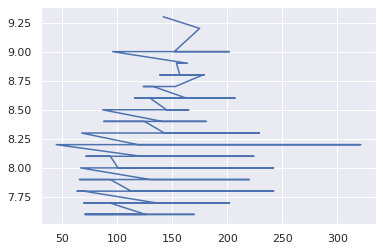

In [46]:
plt.plot(df['duration'],df['rating'],label='rating')

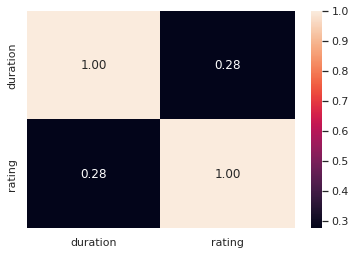

In [47]:
sns.heatmap(df.corr(),annot = True, fmt='.2f')

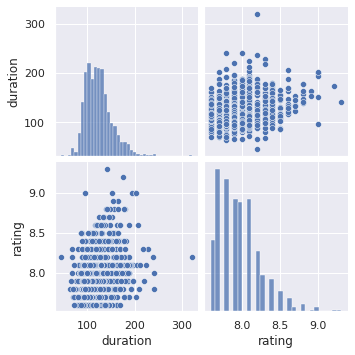

In [48]:
sns.pairplot(df)

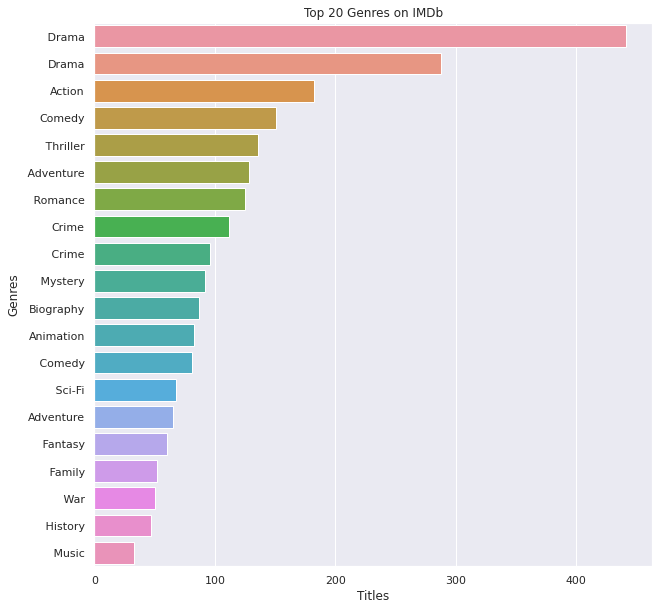

In [49]:
filtered_genres = df.set_index('titles').genre.str.split(',',expand=True).stack().reset_index(level=1,drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres,order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on IMDb')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [50]:
# From the graph above,Drama movies takes the first place, followed by Action and comedy

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8625b38d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8625b27490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8625b38a30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8625b27b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8625b27e50>,
 'means': []}

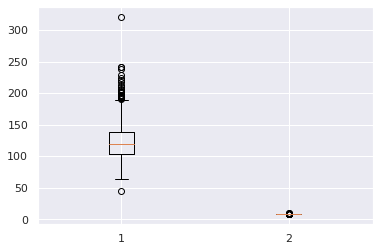

In [51]:
plt.boxplot([df['duration'],df['rating']])

In [52]:
#There are outliers in the first column

In [53]:
import plotly.express as px
years = df.groupby('year')['rating'].mean().reset_index()
px.scatter(years,x='year',y='rating').show()
#Grouped movies by year,trying to see if the rating follows a pattern throughout the years,if the quality of the movies follow a trend
#The users don't seem to be satisfied with the movies nowadays

In [54]:
df['rating'].corr(df['duration'])

0.27621805369952346

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



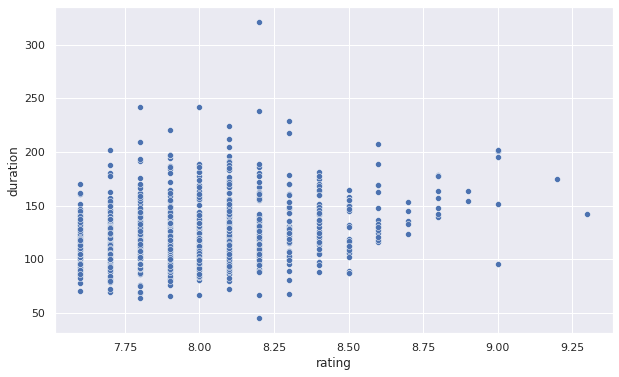

In [55]:
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df.rating,df.duration,ax=ax)
plt.show()
#I want to see if longer duration always results in better rating

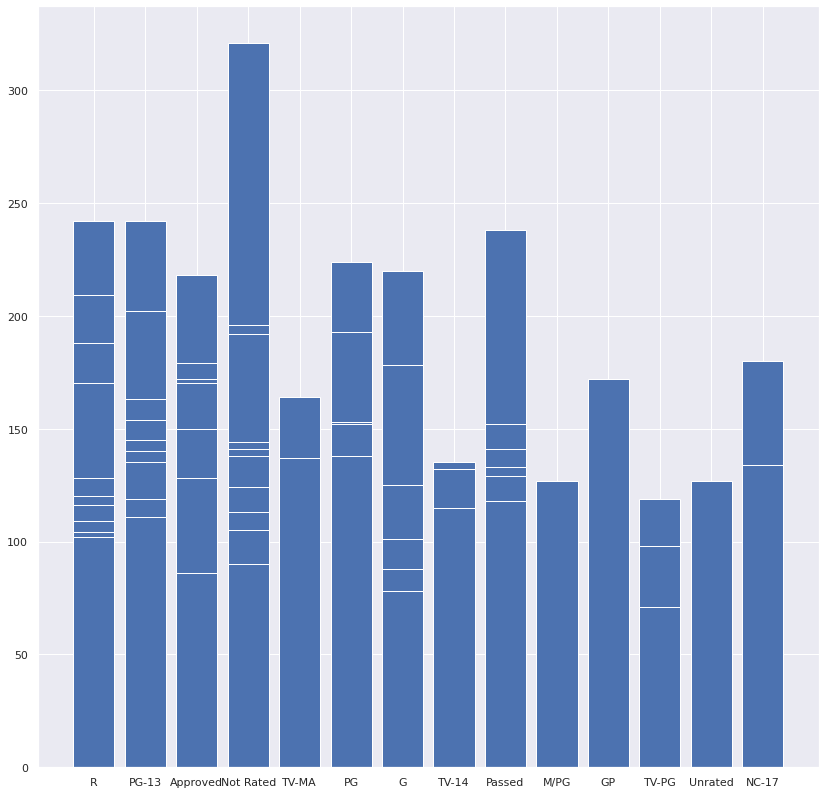

In [56]:
plt.figure(figsize=(14,14))
certification = df['certification']
y = df['duration']
plt.bar(certification,y)
plt.show()